In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from alarmnetclass import AlarmNetNoCuda as AlarmNet  # Assuming this is the AlarmNet class from earlier
from federatedLearn import FederatedLearning
from torch import nn

In [2]:
path = 'smoke_detection_iot.csv'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load and preprocess the data
data = pd.read_csv(path).drop(['Unnamed: 0', 'UTC', 'CNT'], axis=1)
Y_df = data['Fire Alarm']
X_df = data.drop('Fire Alarm', axis=1)

Y_test_raw = X_df.values
Y_raw = Y_df.values

# Split data into train and test
X_train_raw, X_test_raw, Y_train_raw, Y_test_raw = train_test_split(Y_test_raw, Y_raw, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_raw = scaler.fit_transform(X_train_raw)
X_test_raw = scaler.transform(X_test_raw)

# Convert to torch tensors
X_train = torch.tensor(X_train_raw, dtype=torch.float32)
X_test = torch.tensor(X_test_raw, dtype=torch.float32)
Y_train = torch.tensor(Y_train_raw, dtype=torch.float32).reshape(-1, 1)
Y_test = torch.tensor(Y_test_raw, dtype=torch.float32).reshape(-1, 1)

--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.3299
Client 1 - Epoch 200/600, Loss: 0.1240
Client 1 - Epoch 300/600, Loss: 0.0862
Client 1 - Epoch 400/600, Loss: 0.0677
Client 1 - Epoch 500/600, Loss: 0.0548
Client 1 - Epoch 600/600, Loss: 0.0419
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9711578947368421, 'recall': 0.972796288485871, 'f1-score': 0.971976401179941, 'support': 4742.0}, '1.0': {'precision': 0.9892059241904443, 'recall': 0.988544192658249, 'f1-score': 0.988874947720619, 'support': 11959.0}, 'accuracy': 0.9840728100113766, 'macro avg': {'precision': 0.9801819094636433, 'recall': 0.98067024057206, 'f1-score': 0.98042567445028, 'support': 16701.0}, 'weighted avg': {'precision': 0.9840814552563096, 'recall': 0.9840728100113766, 'f1-score': 0.9840768573250801, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 4613   129]
 [  137 11822]]
Client 2 - Epoch 100/600, Loss: 0.3313
Client 2 - Epoch 200/600, Loss

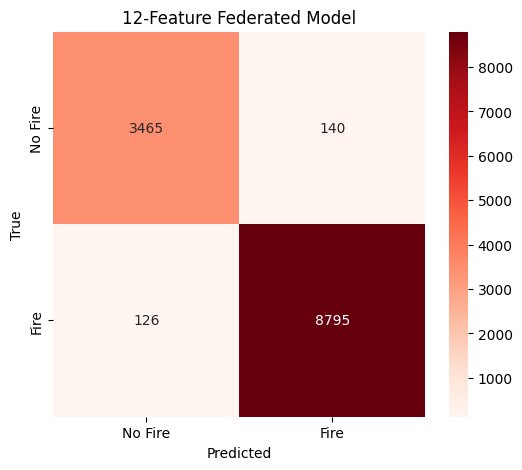


--- Client Reports ---
{'0.0': {'precision': 0.9711578947368421, 'recall': 0.972796288485871, 'f1-score': 0.971976401179941, 'support': 4742.0}, '1.0': {'precision': 0.9892059241904443, 'recall': 0.988544192658249, 'f1-score': 0.988874947720619, 'support': 11959.0}, 'accuracy': 0.9840728100113766, 'macro avg': {'precision': 0.9801819094636433, 'recall': 0.98067024057206, 'f1-score': 0.98042567445028, 'support': 16701.0}, 'weighted avg': {'precision': 0.9840814552563096, 'recall': 0.9840728100113766, 'f1-score': 0.9840768573250801, 'support': 16701.0}}
{'0.0': {'precision': 0.9633085896076352, 'recall': 0.9713430282292558, 'f1-score': 0.9673091257587051, 'support': 4676.0}, '1.0': {'precision': 0.9888202903387285, 'recall': 0.9856133056133056, 'f1-score': 0.9872141934946483, 'support': 12025.0}, 'accuracy': 0.9816178671935812, 'macro avg': {'precision': 0.9760644399731819, 'recall': 0.9784781669212808, 'f1-score': 0.9772616596266768, 'support': 16701.0}, 'weighted avg': {'precision': 0

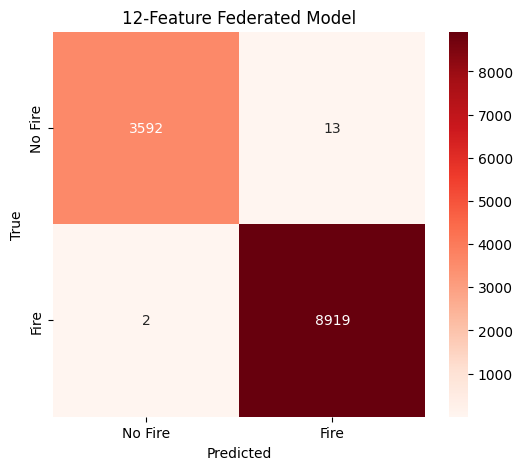


--- Client Reports ---
{'0.0': {'precision': 0.9997885835095137, 'recall': 0.9972585407001265, 'f1-score': 0.9985219594594594, 'support': 4742.0}, '1.0': {'precision': 0.9989140422688163, 'recall': 0.9999163809683084, 'f1-score': 0.9994149603008775, 'support': 11959.0}, 'accuracy': 0.999161726842704, 'macro avg': {'precision': 0.999351312889165, 'recall': 0.9985874608342175, 'f1-score': 0.9989684598801685, 'support': 16701.0}, 'weighted avg': {'precision': 0.9991623552179443, 'recall': 0.999161726842704, 'f1-score': 0.999161406023289, 'support': 16701.0}}
{'0.0': {'precision': 0.9993577392421323, 'recall': 0.998289136013687, 'f1-score': 0.9988231518134161, 'support': 4676.0}, '1.0': {'precision': 0.999334995843724, 'recall': 0.9997505197505198, 'f1-score': 0.9995427146123467, 'support': 12025.0}, 'accuracy': 0.9993413568049817, 'macro avg': {'precision': 0.9993463675429282, 'recall': 0.9990198278821034, 'f1-score': 0.9991829332128814, 'support': 16701.0}, 'weighted avg': {'precision':

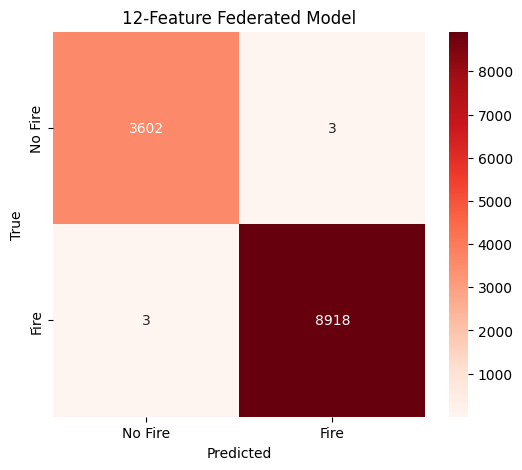


--- Client Reports ---
{'0.0': {'precision': 1.0, 'recall': 0.9995782370307887, 'f1-score': 0.9997890740350137, 'support': 4742.0}, '1.0': {'precision': 0.9998327899005099, 'recall': 1.0, 'f1-score': 0.9999163879598663, 'support': 11959.0}, 'accuracy': 0.9998802466918149, 'macro avg': {'precision': 0.999916394950255, 'recall': 0.9997891185153944, 'f1-score': 0.99985273099744, 'support': 16701.0}, 'weighted avg': {'precision': 0.9998802667157773, 'recall': 0.9998802466918149, 'f1-score': 0.9998802390686831, 'support': 16701.0}}
{'0.0': {'precision': 0.9995720094157928, 'recall': 0.9989307100085543, 'f1-score': 0.9992512568189111, 'support': 4676.0}, '1.0': {'precision': 0.999584303292318, 'recall': 0.9998336798336799, 'f1-score': 0.9997089760113084, 'support': 12025.0}, 'accuracy': 0.999580863421352, 'macro avg': {'precision': 0.9995781563540553, 'recall': 0.999382194921117, 'f1-score': 0.9994801164151097, 'support': 16701.0}, 'weighted avg': {'precision': 0.9995808612130035, 'recall':

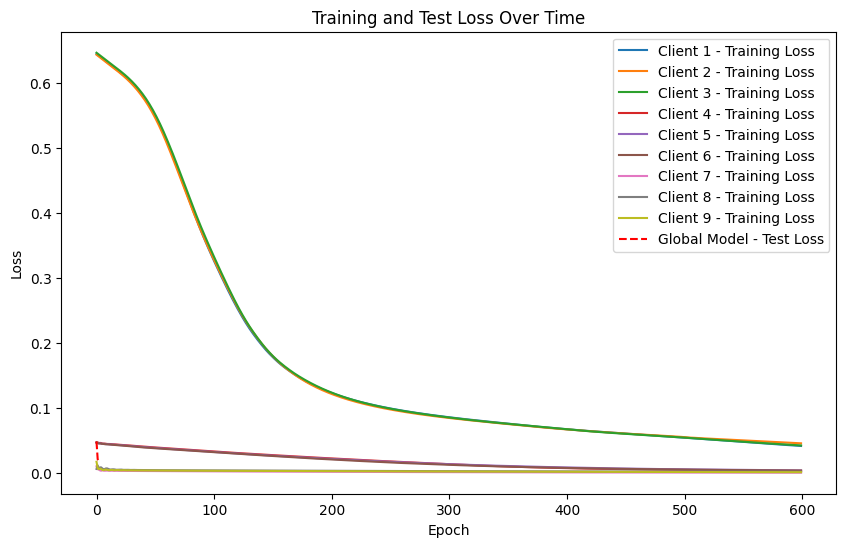

Accuracy: 0.9995209963276385
Precision: 0.999663714830176
Recall: 0.999663714830176
F1: 0.999663714830176
Confusion_matrix:
[[3602    3]
 [   3 8918]]
Classification_report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3605
         1.0       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix for Global Model:
[[3602    3]
 [   3 8918]]


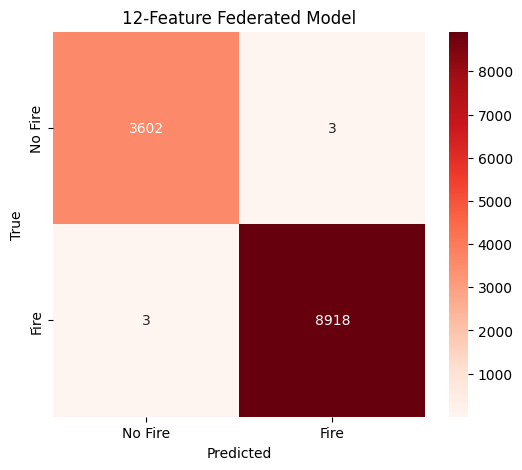

In [3]:
full_global_model = AlarmNet(num_features=X_train.shape[1], hidden_layers=[32, 16, 8])

full_federated_system = FederatedLearning(full_global_model, n_clients=3)

#federated_system.dump_data_to_csv(X_train, Y_train, output_dir='client_data')

full_federated_system.split_data(X_train, Y_train)
full_federated_system.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_test,Y_test=Y_test, conf_title = "12-Feature Federated Model")

full_federated_system.evaluate_global_model(X_test, Y_test, conf_title = "12-Feature Federated Model")

In [4]:
corr = np.abs(data.corr())
ranking = corr['Fire Alarm'].sort_values(ascending=False)[1:]
print(ranking)

num_drops = 8
remaining_features = ranking.index[:-num_drops]


X_df_dropped = data[remaining_features]
print('Remaining features:', X_df_dropped.columns)
X_train_dropped, X_test_dropped, Y_train_dropped, Y_test_dropped = train_test_split(X_df_dropped.values, Y_raw, test_size=0.2, random_state=0)

X_train_dropped = scaler.fit_transform(X_train_dropped)
X_test_dropped = scaler.transform(X_test_dropped)

Humidity[%]       0.399846
Raw Ethanol       0.340652
Pressure[hPa]     0.249797
TVOC[ppb]         0.214743
Temperature[C]    0.163902
NC0.5             0.128118
PM1.0             0.110552
Raw H2            0.107007
eCO2[ppm]         0.097006
PM2.5             0.084916
NC1.0             0.082828
NC2.5             0.057707
Name: Fire Alarm, dtype: float64
Remaining features: Index(['Humidity[%]', 'Raw Ethanol', 'Pressure[hPa]', 'TVOC[ppb]'], dtype='object')


--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.4198
Client 1 - Epoch 200/600, Loss: 0.1877
Client 1 - Epoch 300/600, Loss: 0.1091
Client 1 - Epoch 400/600, Loss: 0.0755
Client 1 - Epoch 500/600, Loss: 0.0573
Client 1 - Epoch 600/600, Loss: 0.0453
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9727427597955707, 'recall': 0.9633066216786166, 'f1-score': 0.9680016952744226, 'support': 4742.0}, '1.0': {'precision': 0.9855060391503541, 'recall': 0.9892967639434735, 'f1-score': 0.9873977633116341, 'support': 11959.0}, 'accuracy': 0.9819172504640441, 'macro avg': {'precision': 0.9791243994729624, 'recall': 0.9763016928110451, 'f1-score': 0.9776997292930283, 'support': 16701.0}, 'weighted avg': {'precision': 0.9818820962307455, 'recall': 0.9819172504640441, 'f1-score': 0.9818905389159419, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 4568   174]
 [  128 11831]]
Client 2 - Epoch 100/600, Loss: 0.4169
Client 2 - Epoch 200/6

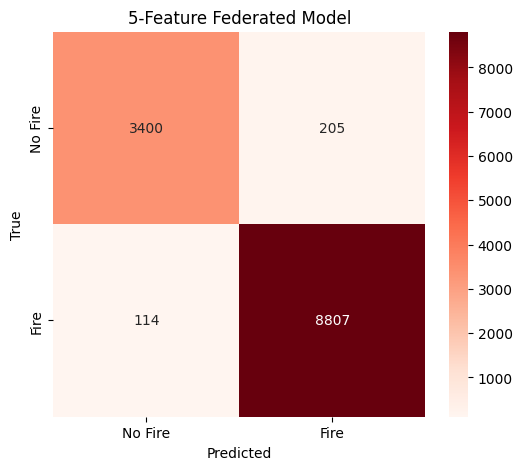


--- Client Reports ---
{'0.0': {'precision': 0.9727427597955707, 'recall': 0.9633066216786166, 'f1-score': 0.9680016952744226, 'support': 4742.0}, '1.0': {'precision': 0.9855060391503541, 'recall': 0.9892967639434735, 'f1-score': 0.9873977633116341, 'support': 11959.0}, 'accuracy': 0.9819172504640441, 'macro avg': {'precision': 0.9791243994729624, 'recall': 0.9763016928110451, 'f1-score': 0.9776997292930283, 'support': 16701.0}, 'weighted avg': {'precision': 0.9818820962307455, 'recall': 0.9819172504640441, 'f1-score': 0.9818905389159419, 'support': 16701.0}}
{'0.0': {'precision': 0.9842943201376936, 'recall': 0.9784003421727973, 'f1-score': 0.9813384813384813, 'support': 4676.0}, '1.0': {'precision': 0.9916203434829503, 'recall': 0.9939293139293139, 'f1-score': 0.9927734861699476, 'support': 12025.0}, 'accuracy': 0.9895814621878929, 'macro avg': {'precision': 0.9879573318103219, 'recall': 0.9861648280510555, 'f1-score': 0.9870559837542145, 'support': 16701.0}, 'weighted avg': {'preci

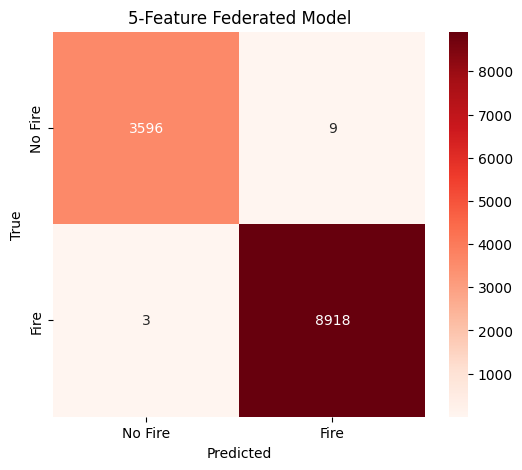


--- Client Reports ---
{'0.0': {'precision': 0.9995772563939971, 'recall': 0.9972585407001265, 'f1-score': 0.9984165523065555, 'support': 4742.0}, '1.0': {'precision': 0.9989139515455305, 'recall': 0.9998327619366167, 'f1-score': 0.999373145555602, 'support': 11959.0}, 'accuracy': 0.9991018501886114, 'macro avg': {'precision': 0.9992456039697638, 'recall': 0.9985456513183717, 'f1-score': 0.9988948489310787, 'support': 16701.0}, 'weighted avg': {'precision': 0.9991022870698361, 'recall': 0.9991018501886114, 'f1-score': 0.9991015351617945, 'support': 16701.0}}
{'0.0': {'precision': 0.9993570510072868, 'recall': 0.9972198460222412, 'f1-score': 0.9982873046456862, 'support': 4676.0}, '1.0': {'precision': 0.9989198171998338, 'recall': 0.9997505197505198, 'f1-score': 0.999334995843724, 'support': 12025.0}, 'accuracy': 0.9990419735345188, 'macro avg': {'precision': 0.9991384341035603, 'recall': 0.9984851828863806, 'f1-score': 0.998811150244705, 'support': 16701.0}, 'weighted avg': {'precisio

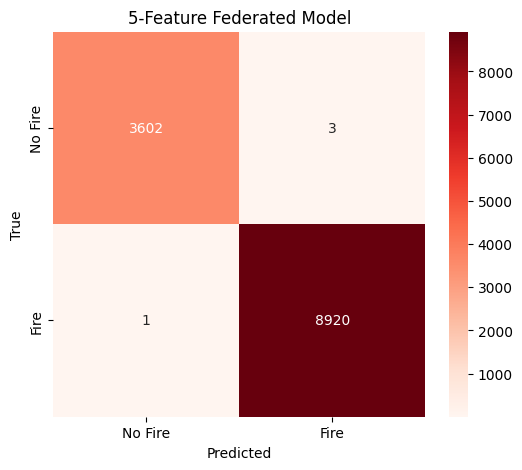


--- Client Reports ---
{'0.0': {'precision': 0.999789029535865, 'recall': 0.9993673555461831, 'f1-score': 0.9995781480700274, 'support': 4742.0}, '1.0': {'precision': 0.999749184850765, 'recall': 0.9999163809683084, 'f1-score': 0.9998327759197324, 'support': 11959.0}, 'accuracy': 0.9997604933836297, 'macro avg': {'precision': 0.999769107193315, 'recall': 0.9996418682572457, 'f1-score': 0.99970546199488, 'support': 16701.0}, 'weighted avg': {'precision': 0.9997604981551625, 'recall': 0.9997604933836297, 'f1-score': 0.9997604781373661, 'support': 16701.0}}
{'0.0': {'precision': 0.9995722840034217, 'recall': 0.9995722840034217, 'f1-score': 0.9995722840034217, 'support': 4676.0}, '1.0': {'precision': 0.9998336798336799, 'recall': 0.9998336798336799, 'f1-score': 0.9998336798336799, 'support': 12025.0}, 'accuracy': 0.9997604933836297, 'macro avg': {'precision': 0.9997029819185508, 'recall': 0.9997029819185508, 'f1-score': 0.9997029819185508, 'support': 16701.0}, 'weighted avg': {'precision'

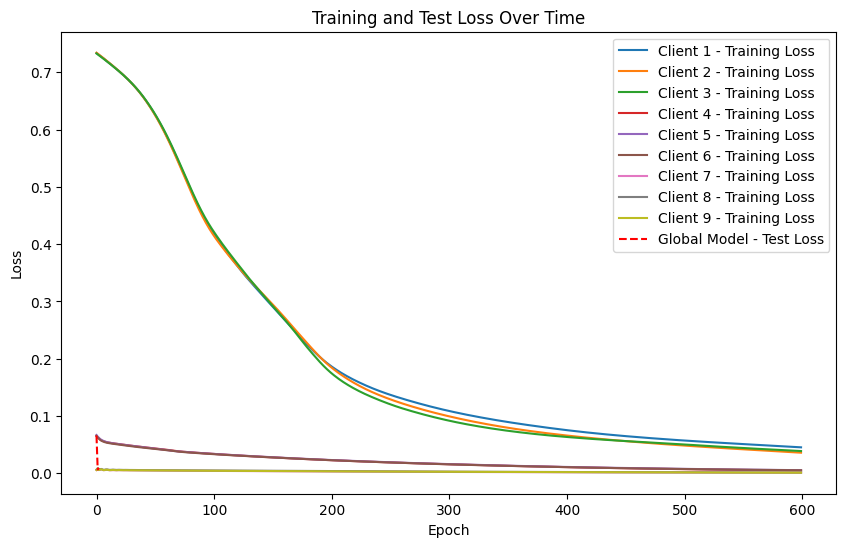

Accuracy: 0.9996806642184257
Precision: 0.999663790205088
Recall: 0.999887904943392
F1: 0.9997758350145707
Confusion_matrix:
[[3602    3]
 [   1 8920]]
Classification_report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3605
         1.0       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix for Global Model:
[[3602    3]
 [   1 8920]]


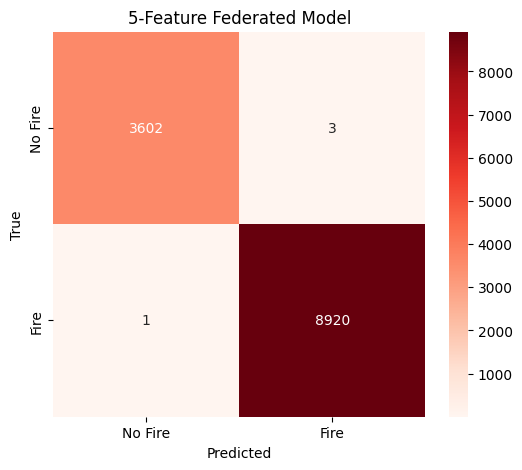

In [5]:
# Convert to torch tensors
X_train_dropped_device = torch.tensor(X_train_raw, dtype=torch.float32)
X_test_dropped_device = torch.tensor(X_test_raw, dtype=torch.float32)
Y_train_dropped_device = torch.tensor(Y_train_raw, dtype=torch.float32).reshape(-1, 1)
Y_test_dropped_device = torch.tensor(Y_test_raw, dtype=torch.float32).reshape(-1, 1)

dropped_global_model = AlarmNet(num_features=X_train.shape[1], hidden_layers=[32, 16, 8])

dropped5f_federated = FederatedLearning(dropped_global_model, n_clients=3)

dropped5f_federated.split_data(X_train_dropped_device, Y_train_dropped_device)
dropped5f_federated.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_test_dropped_device,Y_test=Y_test_dropped_device, conf_title="5-Feature Federated Model")

dropped5f_federated.evaluate_global_model(X_test_dropped_device, Y_test_dropped_device, conf_title="5-Feature Federated Model")

In [6]:
AlarmNet.compare_results(dropped_global_model.get_results(), full_global_model.get_results())

Comparing results:
accuracy: 0.01597188947453374 %
precision: 7.540026228533994e-06 %
recall: 0.022421524663671373 %
f1: 0.011214532344945655 %


In [7]:
import random
from sklearn.impute import SimpleImputer

--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.3682
Client 1 - Epoch 200/600, Loss: 0.1442
Client 1 - Epoch 300/600, Loss: 0.1023
Client 1 - Epoch 400/600, Loss: 0.0750
Client 1 - Epoch 500/600, Loss: 0.0578
Client 1 - Epoch 600/600, Loss: 0.0468
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9664970313825275, 'recall': 0.9611978068325601, 'f1-score': 0.963840135335166, 'support': 4742.0}, '1.0': {'precision': 0.9846474760116812, 'recall': 0.9867881929927251, 'f1-score': 0.9857166722352155, 'support': 11959.0}, 'accuracy': 0.9795221843003413, 'macro avg': {'precision': 0.9755722536971043, 'recall': 0.9739929999126427, 'f1-score': 0.9747784037851908, 'support': 16701.0}, 'weighted avg': {'precision': 0.9794939278150794, 'recall': 0.9795221843003413, 'f1-score': 0.9795051556805162, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 4558   184]
 [  158 11801]]
Client 2 - Epoch 100/600, Loss: 0.3736
Client 2 - Epoch 200/60

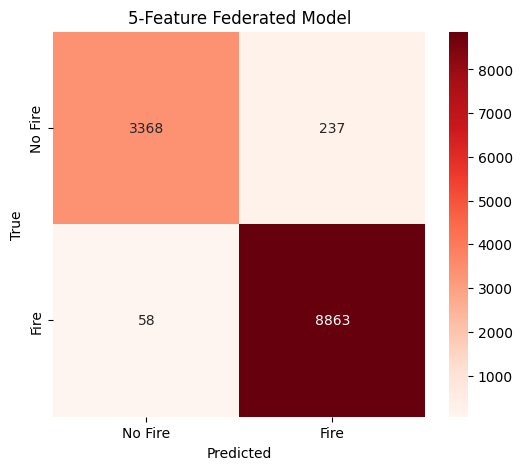


--- Client Reports ---
{'0.0': {'precision': 0.9664970313825275, 'recall': 0.9611978068325601, 'f1-score': 0.963840135335166, 'support': 4742.0}, '1.0': {'precision': 0.9846474760116812, 'recall': 0.9867881929927251, 'f1-score': 0.9857166722352155, 'support': 11959.0}, 'accuracy': 0.9795221843003413, 'macro avg': {'precision': 0.9755722536971043, 'recall': 0.9739929999126427, 'f1-score': 0.9747784037851908, 'support': 16701.0}, 'weighted avg': {'precision': 0.9794939278150794, 'recall': 0.9795221843003413, 'f1-score': 0.9795051556805162, 'support': 16701.0}}
{'0.0': {'precision': 0.9750698474102729, 'recall': 0.97027373823781, 'f1-score': 0.9726658805874155, 'support': 4676.0}, '1.0': {'precision': 0.9884628154050464, 'recall': 0.9903534303534304, 'f1-score': 0.9894072197067254, 'support': 12025.0}, 'accuracy': 0.9847314532063949, 'macro avg': {'precision': 0.9817663314076597, 'recall': 0.9803135842956202, 'f1-score': 0.9810365501470705, 'support': 16701.0}, 'weighted avg': {'precisio

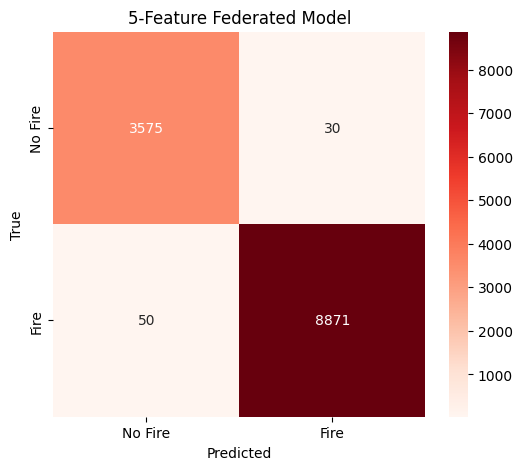


--- Client Reports ---
{'0.0': {'precision': 0.9997886281969985, 'recall': 0.9974694221847322, 'f1-score': 0.9986276786656814, 'support': 4742.0}, '1.0': {'precision': 0.9989974937343359, 'recall': 0.9999163809683084, 'f1-score': 0.9994567261481884, 'support': 11959.0}, 'accuracy': 0.9992216034967966, 'macro avg': {'precision': 0.9993930609656672, 'recall': 0.9986929015765202, 'f1-score': 0.9990422024069349, 'support': 16701.0}, 'weighted avg': {'precision': 0.9992221245721267, 'recall': 0.9992216034967966, 'f1-score': 0.9992213304735553, 'support': 16701.0}}
{'0.0': {'precision': 0.9987154784842646, 'recall': 0.9976475620188195, 'f1-score': 0.9981812346207339, 'support': 4676.0}, '1.0': {'precision': 0.9990856192851205, 'recall': 0.9995010395010395, 'f1-score': 0.9992932862190813, 'support': 12025.0}, 'accuracy': 0.9989820968804263, 'macro avg': {'precision': 0.9989005488846925, 'recall': 0.9985743007599295, 'f1-score': 0.9987372604199076, 'support': 16701.0}, 'weighted avg': {'preci

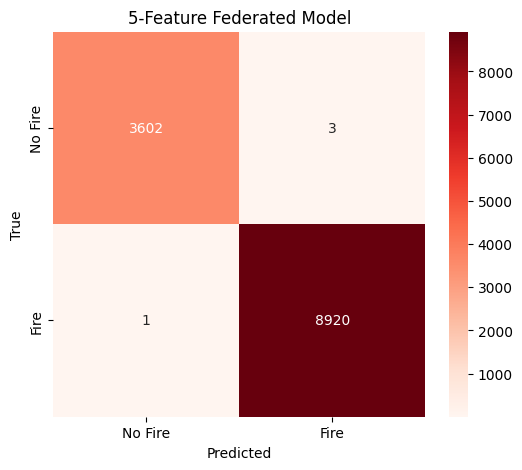


--- Client Reports ---
{'0.0': {'precision': 1.0, 'recall': 0.9987347110923661, 'f1-score': 0.9993669550538088, 'support': 4742.0}, '1.0': {'precision': 0.9994985374007522, 'recall': 1.0, 'f1-score': 0.999749205818425, 'support': 11959.0}, 'accuracy': 0.9996407400754446, 'macro avg': {'precision': 0.9997492687003762, 'recall': 0.9993673555461831, 'f1-score': 0.9995580804361168, 'support': 16701.0}, 'weighted avg': {'precision': 0.9996409202308602, 'recall': 0.9996407400754446, 'f1-score': 0.9996406714117543, 'support': 16701.0}}
{'0.0': {'precision': 0.9995720094157928, 'recall': 0.9989307100085543, 'f1-score': 0.9992512568189111, 'support': 4676.0}, '1.0': {'precision': 0.999584303292318, 'recall': 0.9998336798336799, 'f1-score': 0.9997089760113084, 'support': 12025.0}, 'accuracy': 0.999580863421352, 'macro avg': {'precision': 0.9995781563540553, 'recall': 0.999382194921117, 'f1-score': 0.9994801164151097, 'support': 16701.0}, 'weighted avg': {'precision': 0.9995808612130035, 'recall

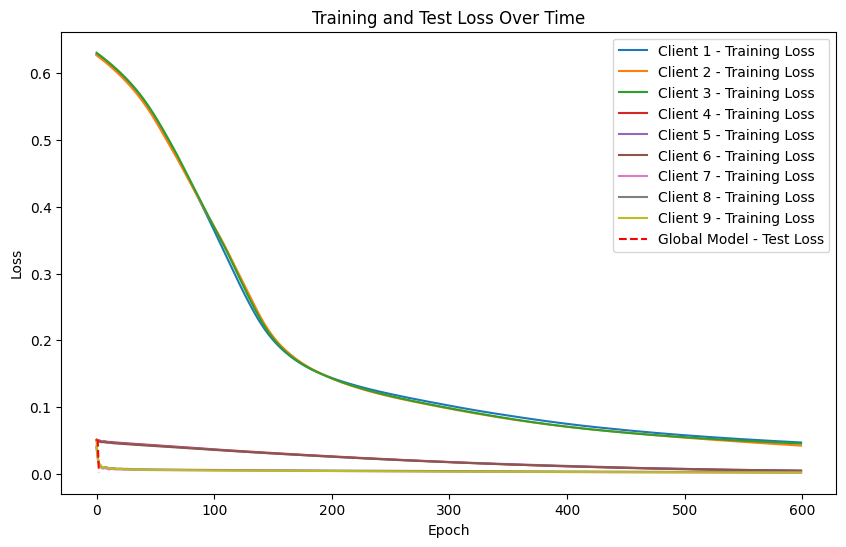

Accuracy: 0.9996806642184257
Precision: 0.999663790205088
Recall: 0.999887904943392
F1: 0.9997758350145707
Confusion_matrix:
[[3602    3]
 [   1 8920]]
Classification_report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3605
         1.0       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526

Confusion Matrix for Global Model:
[[3602    3]
 [   1 8920]]


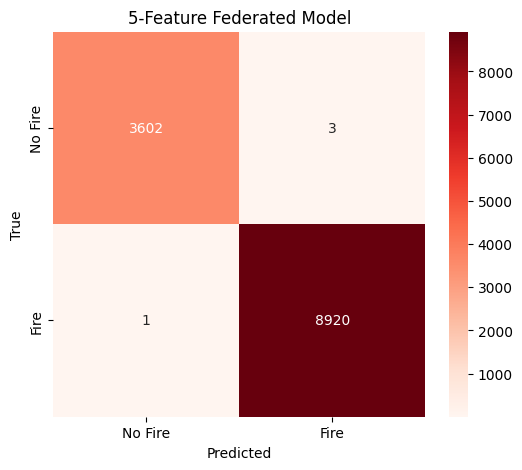

In [8]:
remaining_features_2 = list(remaining_features)
remaining_features_2.append(ranking.index[5])
X_5f = data[remaining_features_2]
X_train_5f, X_test_5f, Y_train_5f, Y_test_5f = train_test_split(X_5f.values, Y_raw, test_size=0.2, random_state=0)

# Introduce sensor errors

VOC_features = [
    'TVOC[ppb]',
    'eCO2[ppm]',
    'Raw H2',
    'Raw Ethanol'
]

PM_features = [
    'PM1.0',
    'PM2.5',
    'NC0.5',
    'NC1.0',
    'NC2.5'
]

th_features = [
    'Temperature[C]',
    'Humidity[%]'
]
pressure_features = [
    'Pressure[hPa]'
]

# For each measurement, each sensor has this chance of introducing an error
error_chance = 0.2

# The PM sensor is twice as likely to fail due to lack of redundancy
chances = [error_chance, error_chance*2, error_chance, error_chance]
sensors = [VOC_features, PM_features, th_features, pressure_features]

error_mask = np.ones(X_5f.shape)

X_error_np = X_5f.values.copy()
for i, datapoint in enumerate(X_5f.values):
    errored_features = []
    for j, sensor in enumerate(sensors):
        sensor_error = random.random() < chances[j]
        if sensor_error:
            errored_features.extend(sensor)
    errored_features = [feature for feature in errored_features if feature in X_5f.columns]
    if errored_features:
        for feature in errored_features:
            X_error_np[i][X_5f.columns.get_loc(feature)] = np.nan
        # print(i, X_error_np[i])

scaler = StandardScaler()
X_train_5f = scaler.fit_transform(X_train_5f)
X_test_5f = scaler.transform(X_test_5f)

X_train_5f_device = torch.tensor(X_train_raw, dtype=torch.float32)
X_test_5f_device = torch.tensor(X_test_raw, dtype=torch.float32)
Y_train_5f_device = torch.tensor(Y_train_raw, dtype=torch.float32).reshape(-1, 1)
Y_test_5f_device = torch.tensor(Y_test_raw, dtype=torch.float32).reshape(-1, 1)

dropped5f_global_model = AlarmNet(num_features=X_train.shape[1], hidden_layers=[32, 16, 8])

dropped5f_federated = FederatedLearning(dropped5f_global_model, n_clients=3)

dropped5f_federated.split_data(X_train_5f_device, Y_train_5f_device)
dropped5f_federated.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_test_5f_device,Y_test=Y_test_5f_device, conf_title="5-Feature Federated Model")

dropped5f_federated.evaluate_global_model(X_test_5f_device, Y_test_5f_device, "5-Feature Federated Model")

In [9]:
AlarmNet.compare_results(dropped5f_global_model.get_results(), full_global_model.get_results())

Comparing results:
accuracy: 0.01597188947453374 %
precision: 7.540026228533994e-06 %
recall: 0.022421524663671373 %
f1: 0.011214532344945655 %


--- Federated Training Round 1 ---
Client 1 - Epoch 100/600, Loss: 0.4179
Client 1 - Epoch 200/600, Loss: 0.2950
Client 1 - Epoch 300/600, Loss: 0.2165
Client 1 - Epoch 400/600, Loss: 0.1829
Client 1 - Epoch 500/600, Loss: 0.1678
Client 1 - Epoch 600/600, Loss: 0.1549
Client 1 training completed.
Classification Report for Client 1:
{'0.0': {'precision': 0.9347929557353641, 'recall': 0.8283424715309996, 'f1-score': 0.8783542039355993, 'support': 4742.0}, '1.0': {'precision': 0.9348747899831986, 'recall': 0.977088385316498, 'f1-score': 0.9555155777250798, 'support': 11959.0}, 'accuracy': 0.9348542003472846, 'macro avg': {'precision': 0.9348338728592813, 'recall': 0.9027154284237489, 'f1-score': 0.9169348908303395, 'support': 16701.0}, 'weighted avg': {'precision': 0.9348515543683713, 'recall': 0.9348542003472846, 'f1-score': 0.9336067558276057, 'support': 16701.0}}
Confusion Matrix for Client 1:
[[ 3928   814]
 [  274 11685]]
Client 2 - Epoch 100/600, Loss: 0.4169
Client 2 - Epoch 200/60

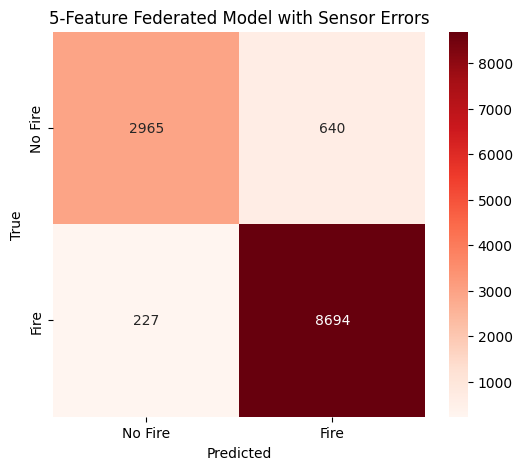


--- Client Reports ---
{'0.0': {'precision': 0.9347929557353641, 'recall': 0.8283424715309996, 'f1-score': 0.8783542039355993, 'support': 4742.0}, '1.0': {'precision': 0.9348747899831986, 'recall': 0.977088385316498, 'f1-score': 0.9555155777250798, 'support': 11959.0}, 'accuracy': 0.9348542003472846, 'macro avg': {'precision': 0.9348338728592813, 'recall': 0.9027154284237489, 'f1-score': 0.9169348908303395, 'support': 16701.0}, 'weighted avg': {'precision': 0.9348515543683713, 'recall': 0.9348542003472846, 'f1-score': 0.9336067558276057, 'support': 16701.0}}
{'0.0': {'precision': 0.9373002212933366, 'recall': 0.8152266894781864, 'f1-score': 0.8720118952304701, 'support': 4676.0}, '1.0': {'precision': 0.9316131074877315, 'recall': 0.9787941787941788, 'f1-score': 0.9546210308609433, 'support': 12025.0}, 'accuracy': 0.932998024070415, 'macro avg': {'precision': 0.9344566643905341, 'recall': 0.8970104341361826, 'f1-score': 0.9133164630457067, 'support': 16701.0}, 'weighted avg': {'precisi

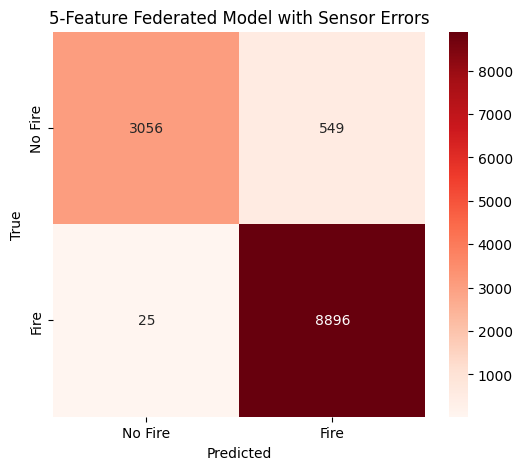


--- Client Reports ---
{'0.0': {'precision': 0.9777777777777777, 'recall': 0.9278785322648672, 'f1-score': 0.9521748539277213, 'support': 4742.0}, '1.0': {'precision': 0.9719695106958446, 'recall': 0.9916380968308387, 'f1-score': 0.981705298013245, 'support': 11959.0}, 'accuracy': 0.9735345188910843, 'macro avg': {'precision': 0.9748736442368111, 'recall': 0.959758314547853, 'f1-score': 0.9669400759704831, 'support': 16701.0}, 'weighted avg': {'precision': 0.9736186815540283, 'recall': 0.9735345188910843, 'f1-score': 0.9733205686046136, 'support': 16701.0}}
{'0.0': {'precision': 0.986455463728191, 'recall': 0.9189478186484175, 'f1-score': 0.9515057573073517, 'support': 4676.0}, '1.0': {'precision': 0.9692993114621304, 'recall': 0.9950935550935551, 'f1-score': 0.9820270824784572, 'support': 12025.0}, 'accuracy': 0.9737740255074546, 'macro avg': {'precision': 0.9778773875951607, 'recall': 0.9570206868709863, 'f1-score': 0.9667664198929045, 'support': 16701.0}, 'weighted avg': {'precisio

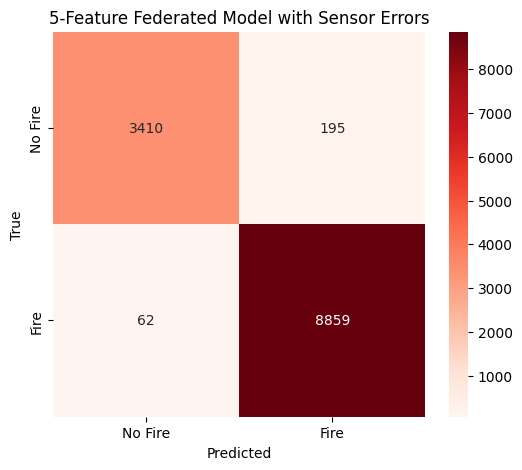


--- Client Reports ---
{'0.0': {'precision': 0.9787839020122485, 'recall': 0.943694643610291, 'f1-score': 0.9609190465965214, 'support': 4742.0}, '1.0': {'precision': 0.9779866435814989, 'recall': 0.9918889539259136, 'f1-score': 0.9848887412819661, 'support': 11959.0}, 'accuracy': 0.9782048979103047, 'macro avg': {'precision': 0.9783852727968737, 'recall': 0.9677917987681023, 'f1-score': 0.9729038939392438, 'support': 16701.0}, 'weighted avg': {'precision': 0.9782130132287424, 'recall': 0.9782048979103047, 'f1-score': 0.978082903775327, 'support': 16701.0}}
{'0.0': {'precision': 0.9881298992161254, 'recall': 0.9435414884516681, 'f1-score': 0.9653210808445466, 'support': 4676.0}, '1.0': {'precision': 0.9784243216737496, 'recall': 0.9955925155925156, 'f1-score': 0.9869337620048638, 'support': 12025.0}, 'accuracy': 0.9810191006526555, 'macro avg': {'precision': 0.9832771104449375, 'recall': 0.9695670020220919, 'f1-score': 0.9761274214247052, 'support': 16701.0}, 'weighted avg': {'precisi

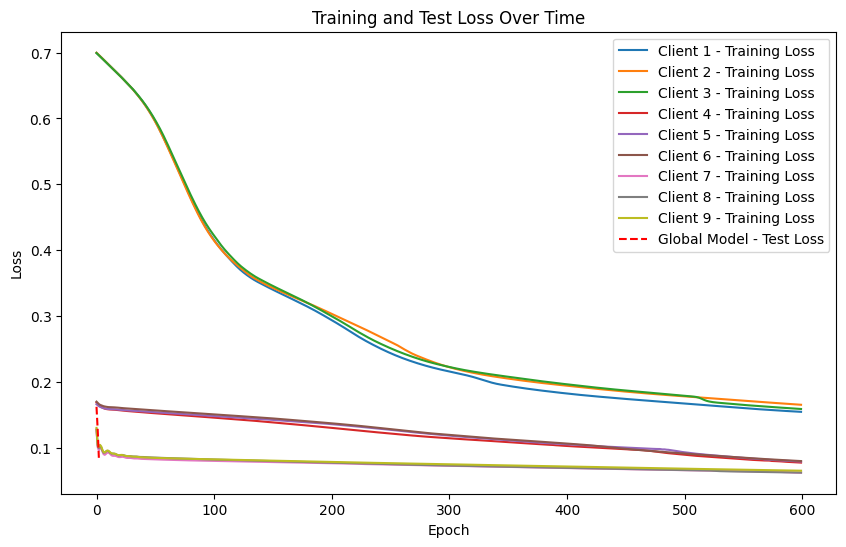

Accuracy: 0.9794826760338496
Precision: 0.9784625579854208
Recall: 0.9930501064903038
F1: 0.985702364394993
Confusion_matrix:
[[3410  195]
 [  62 8859]]
Classification_report:               precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      3605
         1.0       0.98      0.99      0.99      8921

    accuracy                           0.98     12526
   macro avg       0.98      0.97      0.97     12526
weighted avg       0.98      0.98      0.98     12526

Confusion Matrix for Global Model:
[[3410  195]
 [  62 8859]]


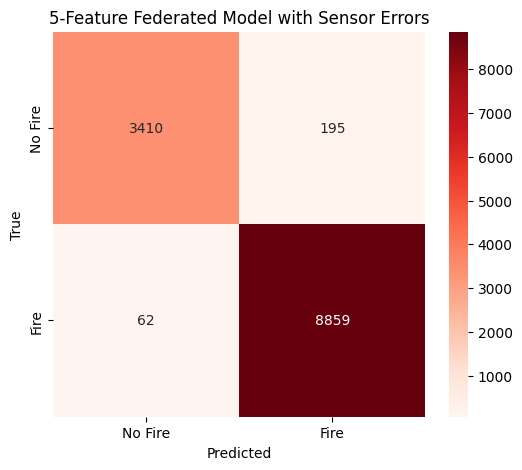

In [13]:
from sklearn.impute import SimpleImputer
X_error_train, X_error_test, Y_error_train, Y_error_test = train_test_split(X_error_np, Y_raw, test_size=0.2, random_state=0)

imputer = SimpleImputer(strategy='median')
#imputer.fit(X_5f.values)
imputer.fit(X_error_train)
X_impute_train = imputer.transform(X_error_train)
X_impute_test = imputer.transform(X_error_test)
scaler = StandardScaler()
X_impute_train = scaler.fit_transform(X_impute_train)
X_impute_test = scaler.transform(X_impute_test)

X_error_train_device = torch.tensor(X_impute_train, dtype=torch.float32)
X_error_test_device = torch.tensor(X_impute_test, dtype=torch.float32)
Y_error_train_device = torch.tensor(Y_error_train, dtype=torch.float32).reshape(-1, 1)
Y_error_test_device = torch.tensor(Y_error_test, dtype=torch.float32).reshape(-1, 1)

global_error_model = AlarmNet(num_features=X_error_train.shape[1], hidden_layers=[32, 16, 8])

error_federated = FederatedLearning(global_error_model, n_clients=3)
error_federated.split_data(X_error_train_device, Y_error_train_device)
error_federated.federated_training(epochs_per_round=600, lr=0.001, n_rounds=3,X_test=X_error_test_device,Y_test=Y_error_test_device, conf_title="5-Feature Federated Model with Sensor Errors")
error_federated.evaluate_global_model(X_error_test_device, Y_error_test_device, "5-Feature Federated Model with Sensor Errors")

In [11]:
AlarmNet.compare_results(global_error_model.get_results(), dropped5f_global_model.get_results())

Comparing results:
accuracy: -2.5049115913556075 %
precision: -2.544989091407774 %
recall: -0.9163932571557812 %
f1: -1.7307824428221406 %
